In [2]:
import numpy as np
import scvi
import matplotlib.pyplot as plt

/Users/leanderdiaz-bone/Developer/scvi-tools/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/Users/leanderdiaz-bone/Developer/scvi-tools/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [32]:
def computeVars(zs):
    vars = []
    for i in range(zs.shape[1]):
        vars.append(np.var(np.array(np.transpose(zs.cpu().detach())[i])))
    return vars

In [4]:
vaeVP = scvi.model.SCVI.load("models/test2")
adata = vaeVP.adata
prior = vaeVP.module.prior

INFO     No backup URL provided for missing file models/test2/model.pt                                             


type: Failed to load model file at models/test2/model.pt. If attempting to load a saved model from <v0.15.0, please use the util function `convert_legacy_save` to convert to an updated format.

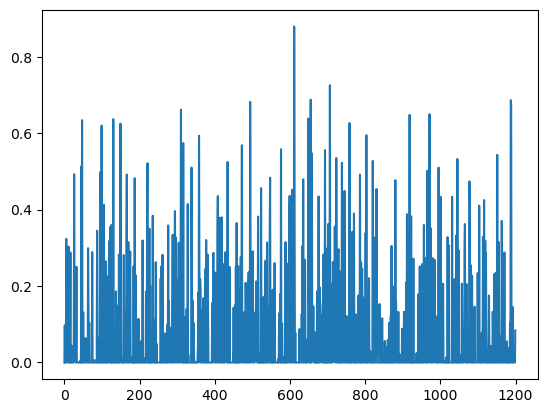

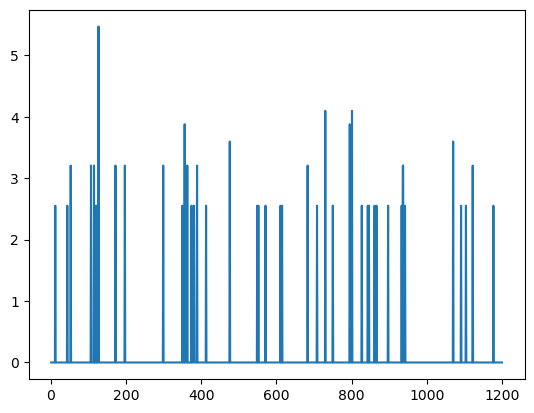

In [15]:
pseudo_inputs, _ = vaeVP.module.prior.get_pseudo_inputs()
plt.plot(pseudo_inputs.cpu().detach()[1])
plt.show()
plt.plot(np.linspace(1,1200,1200),np.array(adata.X.todense()[1])[0])

In [33]:
inputs = prior.pseudo_transfromer(prior.pseudo_inputs)
dist, zs = prior.encoder(inputs)
computeVars(zs)

[1.0541713, 0.24453135]

In [3]:
vae_SD = scvi.model.SCVI(adata, prior_distribution = "sdnormal")
vae_N  = scvi.model.SCVI(adata, prior_distribution = "normal")
vae_MG = scvi.model.SCVI(adata, prior_distribution = "mixofgaus", prior_kwargs={"k":100})
vae_VP = scvi.model.SCVI(adata, prior_distribution = "vamp")

type: name 'adata' is not defined